# PARTE 4.2.2. - MODELLING - RANDOM FOREST

## Importación librerías y lectura del DF

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Lectura DF
df = pd.read_csv('/content/drive/MyDrive/MASTER_DATA_SCIENCE/Entregables & TFM/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/HEART_DISEASE_PREMODELLING.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13308 entries, 0 to 13307
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HEIGHT                         13308 non-null  float64
 1   WAIST_CIRCUMFERENCE_LOG        13308 non-null  float64
 2   SYSTOLIC_MEAN_LOG              13308 non-null  float64
 3   DIASTOLIC_MEAN                 13308 non-null  float64
 4   PULSE_MEAN_LOG                 13308 non-null  float64
 5   ALBUMIN_URINE_LOG              13308 non-null  float64
 6   CREATININE_URINE_LOG           13308 non-null  float64
 7   HDL_LOG                        13308 non-null  float64
 8   TOTAL_CHOLE_LOG                13308 non-null  float64
 9   LYMPHOCYTE_LOG                 13308 non-null  float64
 10  MONOCYTE_LOG                   13308 non-null  float64
 11  SEGM_NEUTROPHILS_LOG           13308 non-null  float64
 12  EOSINOPHILS                    13308 non-null 

In [ ]:
df.shape

(13308, 66)

## TRAIN / TEST SPLIT

In [ ]:
# Separar las características (X) de la variable objetivo (y)
x = df.drop("HEART_DISEASE", axis=1)
y = df["HEART_DISEASE"]

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

corrs = [pearsonr(x.iloc[:, i], y)[0] for i in range(x.shape[1])]
# Seleccionar índices con |corr| ≥ 0.1 (por ejemplo)
idx_sel = [i for i, c in enumerate(corrs) if abs(c) >= 0.1]
# Use .iloc to select columns by integer position
X_reducido = x.iloc[:, idx_sel]

In [ ]:
X_reducido.shape

(13308, 18)

In [ ]:
y.shape

(13308,)

In [ ]:
# Seleccionamos muestra aleatoria
validation = int(len(df) * 0.2)
df_val = df.sample(n=validation, random_state=42)

In [ ]:
# Incluir el resto de los datos en el df_dev
df_dev = df.drop(df_val.index)

In [ ]:
# Comprobar que esten todas las filas
df_val.shape[0]+df_dev.shape[0]

13308

In [ ]:
df_val.shape[0]

2661

In [ ]:
df_dev.shape[0]

10647

In [ ]:
df_dev_x=df_dev.drop("HEART_DISEASE", axis=1)
df_dev_y=df_dev["HEART_DISEASE"]

In [ ]:
df_val_x=df_dev.drop("HEART_DISEASE", axis=1)
df_val_y=df_dev["HEART_DISEASE"]

In [ ]:
from sklearn import model_selection

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df_dev_x, df_dev_y, test_size=0.30, random_state=42)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    X_reducido, y, test_size=0.30, random_state=42)

In [ ]:
print("El número de columnas en el conjunto de entrenamiento es:", x_train.shape[1])
print("El número de columnas en el conjunto de prueba es:", x_test.shape[1])

El número de columnas en el conjunto de entrenamiento es: 18
El número de columnas en el conjunto de prueba es: 18


In [ ]:
y_train.describe().T.head()

count    9315.000000
mean        0.215674
std         0.411311
min         0.000000
25%         0.000000
Name: HEART_DISEASE, dtype: float64

In [ ]:
y_test.describe().T.head()

count    3993.000000
mean        0.213874
std         0.410090
min         0.000000
25%         0.000000
Name: HEART_DISEASE, dtype: float64

Como la media del target en test y train es la misma, la reparticion de las filas esta balanceada.

## Model definition: Random Forest Classifier

### n_estimators=5, max_depth=5, random_state=42

In [ ]:
rf= RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1935803228)

#### Model evaluation: Random Forest Classifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(3163)

In [ ]:
results_rf['Success'].mean()

np.float64(0.7921362384172301)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3163 registros de un total de 3993, por tanto el Accuracy es 0.7921362384172301.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0   1
HEART_DISEASE_original           
0                        3087  52
1                         778  76

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.7921362384172301)

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.15478615071283094

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      3139
           1       0.59      0.09      0.15       854

    accuracy                           0.79      3993
   macro avg       0.70      0.54      0.52      3993
weighted avg       0.75      0.79      0.73      3993



### n_estimators=100, max_depth=5, random_state=42

In [ ]:
rf= RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1935803228)

#### Model evaluation: Random Forest Classifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(3152)

In [ ]:
results_rf['Success'].mean()

np.float64(0.789381417480591)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3152 registros de un total de 3993, por tanto el Accuracy es 0.789381417480591.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0   1
HEART_DISEASE_original           
0                        3115  24
1                         817  37

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.789381417480591)

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.08087431693989071

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3139
           1       0.61      0.04      0.08       854

    accuracy                           0.79      3993
   macro avg       0.70      0.52      0.48      3993
weighted avg       0.75      0.79      0.71      3993



### n_estimators=50, max_depth=5, random_state=42

In [ ]:
rf= RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1935803228)

#### Model evaluation: Random Forest Classifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(3155)

In [ ]:
results_rf['Success'].mean()

np.float64(0.7901327322814926)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3155 registros de un total de 3993, por tanto el Accuracy es 0.7901327322814926.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0   1
HEART_DISEASE_original           
0                        3111  28
1                         810  44

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.7901327322814926)

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.09503239740820735

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3139
           1       0.61      0.05      0.10       854

    accuracy                           0.79      3993
   macro avg       0.70      0.52      0.49      3993
weighted avg       0.75      0.79      0.71      3993



### n_estimators=30, max_depth=5, random_state=42

In [ ]:
rf= RandomForestClassifier(n_estimators=30, max_depth=5, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=30, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1935803228)

#### Model evaluation: Random Forest Classifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(3156)

In [ ]:
results_rf['Success'].mean()

np.float64(0.7903831705484599)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3156 registros de un total de 3993, por tanto el Accuracy es 0.7903831705484599.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0   1
HEART_DISEASE_original           
0                        3109  30
1                         807  47

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.7903831705484599)

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.10096670247046187

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3139
           1       0.61      0.06      0.10       854

    accuracy                           0.79      3993
   macro avg       0.70      0.52      0.49      3993
weighted avg       0.75      0.79      0.71      3993



### n_estimators=5, max_depth=10, random_state=42 - EL QUE MÁS DETECTA

In [ ]:
rf= RandomForestClassifier(n_estimators=5, max_depth=10, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=5, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1935803228)

#### Model evaluation: Random Forest Classifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        1        1
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        1        1
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        1        1
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(3118)

In [ ]:
results_rf['Success'].mean()

np.float64(0.7808665164037065)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3118 registros de un total de 3993, por tanto el Accuracy es 0.7808665164037065.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0    1
HEART_DISEASE_original            
0                        2978  161
1                         714  140

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.7808665164037065)

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.24242424242424243

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3139
           1       0.47      0.16      0.24       854

    accuracy                           0.78      3993
   macro avg       0.64      0.56      0.56      3993
weighted avg       0.73      0.78      0.74      3993



### n_estimators=5, max_depth=7, random_state=42

In [ ]:
rf= RandomForestClassifier(n_estimators=5, max_depth=7, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=5, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1935803228)

#### Model evaluation: Random Forest Classifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(3149)

In [ ]:
results_rf['Success'].mean()

np.float64(0.7886301026796895)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3149 registros de un total de 3993, por tanto el Accuracy es 0.7886301026796895.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0    1
HEART_DISEASE_original            
0                        3025  114
1                         730  124

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.7886301026796895)

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.2271062271062271

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      3139
           1       0.52      0.15      0.23       854

    accuracy                           0.79      3993
   macro avg       0.66      0.55      0.55      3993
weighted avg       0.74      0.79      0.74      3993



### n_estimators=100, max_depth=10, random_state=42

In [ ]:
rf= RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1935803228)

#### Model evaluation: Random Forest Classifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(3170)

In [ ]:
results_rf['Success'].mean()

np.float64(0.7938893062860005)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3170 registros de un total de 3993, por tanto el Accuracy es 0.7938893062860005.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0   1
HEART_DISEASE_original           
0                        3073  66
1                         757  97

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.7938893062860005)

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.19075712881022616

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      3139
           1       0.60      0.11      0.19       854

    accuracy                           0.79      3993
   macro avg       0.70      0.55      0.54      3993
weighted avg       0.76      0.79      0.73      3993



### SOBREMUESTREO

In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Forma de x_train original:", x_train.shape)
print("Forma de y_train original:", y_train.shape)
print("Forma de x_train_resampled:", x_train_resampled.shape)
print("Forma de y_train_resampled:", y_train_resampled.shape)

# Verificar la distribución de clases en el conjunto sobremuestreado
print("\nDistribución de clases en y_train original:")
print(y_train.value_counts())
print("\nDistribución de clases en y_train_resampled:")
print(y_train_resampled.value_counts())

Forma de x_train original: (9315, 18)
Forma de y_train original: (9315,)
Forma de x_train_resampled: (14612, 18)
Forma de y_train_resampled: (14612,)

Distribución de clases en y_train original:
HEART_DISEASE
0    7306
1    2009
Name: count, dtype: int64

Distribución de clases en y_train_resampled:
HEART_DISEASE
0    7306
1    7306
Name: count, dtype: int64


##### n_estimators=5, max_depth=10, random_state=42 - EL QUE MÁS DETECTA

In [ ]:
rf= RandomForestClassifier(n_estimators=5, max_depth=10, random_state=42)

In [ ]:
rf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, n_estimators=5, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1935803228)

##### Model evaluation: Random Forest Classifier

###### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               1
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        1        1
12281                       0                        0        1
6298                        1                        1        1
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        1        1
6706                        1                        1        1
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        1        0
10435                       0                        1        0
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(2780)

In [ ]:
results_rf['Success'].mean()

np.float64(0.6962183821687954)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 2780 registros de un total de 3993, por tanto el Accuracy es 0.6962183821687954.


###### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0    1
HEART_DISEASE_original            
0                        2351  788
1                         425  429

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.6962183821687954)

###### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.41429261226460645

###### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.75      0.79      3139
           1       0.35      0.50      0.41       854

    accuracy                           0.70      3993
   macro avg       0.60      0.63      0.60      3993
weighted avg       0.74      0.70      0.71      3993



### SUBMUESTREO - BUENA OPCIÓN

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Crear el objeto RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplicar submuestreo al conjunto de entrenamiento
x_train_undersampled, y_train_undersampled = rus.fit_resample(x_train, y_train)

print("Forma de x_train original:", x_train.shape)
print("Forma de y_train original:", y_train.shape)
print("Forma de x_train_undersampled:", x_train_undersampled.shape)
print("Forma de y_train_undersampled:", y_train_undersampled.shape)

# Verificar la distribución de clases en el conjunto submuestreado
print("\nDistribución de clases en y_train original:")
print(y_train.value_counts())
print("\nDistribución de clases en y_train_undersampled:")
print(y_train_undersampled.value_counts())

Forma de x_train original: (9315, 18)
Forma de y_train original: (9315,)
Forma de x_train_undersampled: (4018, 18)
Forma de y_train_undersampled: (4018,)

Distribución de clases en y_train original:
HEART_DISEASE
0    7306
1    2009
Name: count, dtype: int64

Distribución de clases en y_train_undersampled:
HEART_DISEASE
0    2009
1    2009
Name: count, dtype: int64


##### n_estimators=5, max_depth=10, random_state=42 - EL QUE MÁS DETECTA

In [ ]:
rf= RandomForestClassifier(n_estimators=5, max_depth=10, random_state=42)

In [ ]:
rf.fit(x_train_undersampled, y_train_undersampled)

RandomForestClassifier(max_depth=10, n_estimators=5, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1935803228)

##### Model evaluation: Random Forest Classifier

###### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        1        1
7109                        1                        0        0
12359                       0                        1        0
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        1        1
6798                        0                        0        1
9455                        1                        1        1
399                         0                        1        0
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        1        0
5643                        1                        1        1
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(2609)

In [ ]:
results_rf['Success'].mean()

np.float64(0.6533934385174055)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 2609 registros de un total de 3993, por tanto el Accuracy es 0.6533934385174055.


###### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0     1
HEART_DISEASE_original             
0                        2072  1067
1                         317   537

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.6533934385174055)

###### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.4369406021155411

###### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75      3139
           1       0.33      0.63      0.44       854

    accuracy                           0.65      3993
   macro avg       0.60      0.64      0.59      3993
weighted avg       0.75      0.65      0.68      3993



In [ ]:
y_test_proba_rf = rf.predict_proba(x_test)
print(y_test_proba_rf[:5])

[[0.78343685 0.21656315]
 [0.59140975 0.40859025]
 [0.51189036 0.48810964]
 [0.62752193 0.37247807]
 [0.77573142 0.22426858]]


###### Opción 5: PREDICT.PROBA()

In [ ]:
probas = rf.predict_proba(x_test)

Media de probabilidad de clase positiva: 0.45966050206009745
Máxima probabilidad: 1.0
Mínima probabilidad: 0.03639249639249639


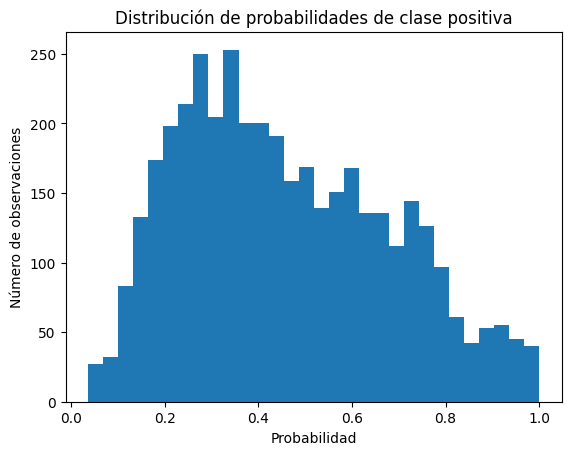

In [ ]:
probas_clase_positiva = probas[:, 1]  # Todas las probabilidades de clase 1

print("Media de probabilidad de clase positiva:", np.mean(probas_clase_positiva))

# Máximo y mínimo
print("Máxima probabilidad:", np.max(probas_clase_positiva))
print("Mínima probabilidad:", np.min(probas_clase_positiva))


plt.hist(probas_clase_positiva, bins=30)
plt.title("Distribución de probabilidades de clase positiva")
plt.xlabel("Probabilidad")
plt.ylabel("Número de observaciones")
plt.show()

Media de probabilidad de clase 0: 0.5403394979399024
Máxima probabilidad: 0.9636075036075036
Mínima probabilidad: 0.0


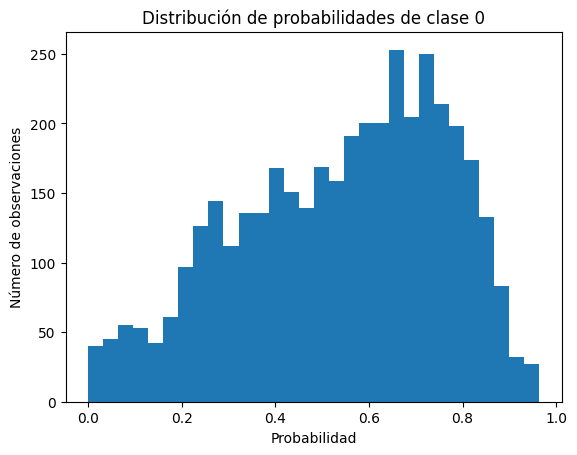

In [ ]:
probas_clase_0 = probas[:, 0]  # Todas las probabilidades de clase 1

print("Media de probabilidad de clase 0:", np.mean(probas_clase_0))

# Máximo y mínimo
print("Máxima probabilidad:", np.max(probas_clase_0))
print("Mínima probabilidad:", np.min(probas_clase_0))


plt.hist(probas_clase_0, bins=30)
plt.title("Distribución de probabilidades de clase 0")
plt.xlabel("Probabilidad")
plt.ylabel("Número de observaciones")
plt.show()

##### TEST: CAMBIO DE UMBRAL (0.3) - Model evaluation: Random Forest Classifier

Me sube el recall, me baja el acc

In [ ]:
y_proba = rf.predict_proba(x_test)[:, 1]

In [ ]:
umbral = 0.3
y_pred = (y_proba >= umbral).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1040 2099]
 [ 120  734]]
              precision    recall  f1-score   support

           0       0.90      0.33      0.48      3139
           1       0.26      0.86      0.40       854

    accuracy                           0.44      3993
   macro avg       0.58      0.60      0.44      3993
weighted avg       0.76      0.44      0.47      3993



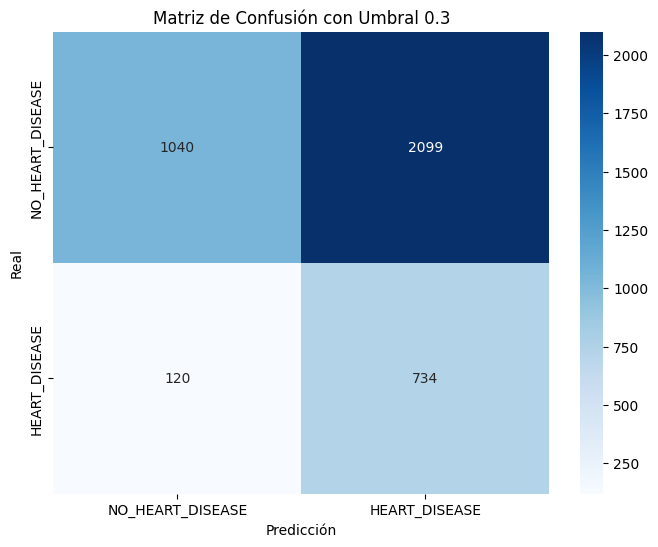

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO_HEART_DISEASE', 'HEART_DISEASE'], yticklabels=['NO_HEART_DISEASE', 'HEART_DISEASE'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión con Umbral ' + str(umbral))
plt.show()


##### TEST: CAMBIO DE UMBRAL (0.4) - Model evaluation: Random Forest Classifier

Me BAJA el recall, me SUBE el acc y el RECALL de 0

In [ ]:
y_proba = rf.predict_proba(x_test)[:, 1]

In [ ]:
umbral = 0.4
y_pred = (y_proba >= umbral).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1617 1522]
 [ 225  629]]
              precision    recall  f1-score   support

           0       0.88      0.52      0.65      3139
           1       0.29      0.74      0.42       854

    accuracy                           0.56      3993
   macro avg       0.59      0.63      0.53      3993
weighted avg       0.75      0.56      0.60      3993



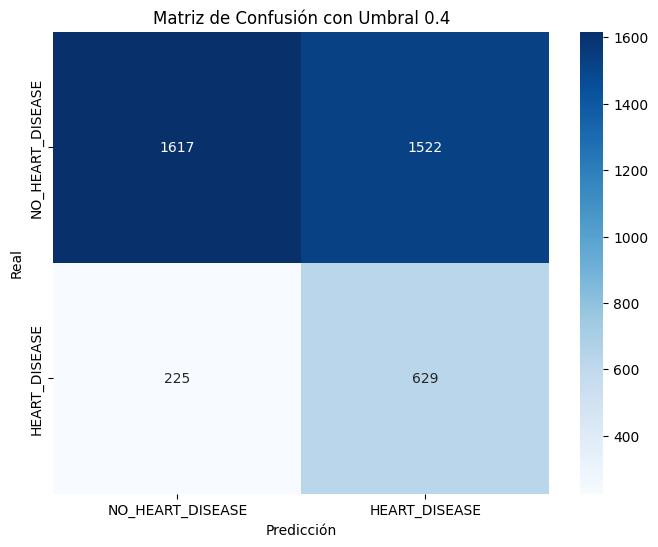

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO_HEART_DISEASE', 'HEART_DISEASE'], yticklabels=['NO_HEART_DISEASE', 'HEART_DISEASE'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión con Umbral ' + str(umbral))
plt.show()


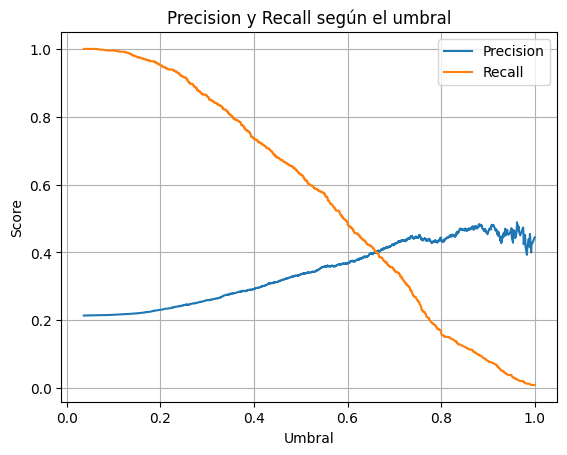

In [ ]:
from sklearn.metrics import precision_recall_curve

probas = rf.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probas)

import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Umbral')
plt.ylabel('Score')
plt.legend()
plt.title('Precision y Recall según el umbral')
plt.grid(True)
plt.show()

In [ ]:
# Filtrar los falsos negativos
false_negatives = results_rf[(results_rf['HEART_DISEASE_original'] == 1) & (results_rf['HEART_DISEASE_predicted'] == 0)]

# Imprimir las filas correspondientes a los falsos negativos
print("Filas donde se producen falsos negativos:")
false_negatives

Filas donde se producen falsos negativos:


HEART_DISEASE_original  HEART_DISEASE_predicted  Success
2453                        1                        0        0
2859                        1                        0        0
7109                        1                        0        0
11201                       1                        0        0
11895                       1                        0        0
...                       ...                      ...      ...
7676                        1                        0        0
6496                        1                        0        0
2959                        1                        0        0
6458                        1                        0        0
6958                        1                        0        0

[317 rows x 3 columns]

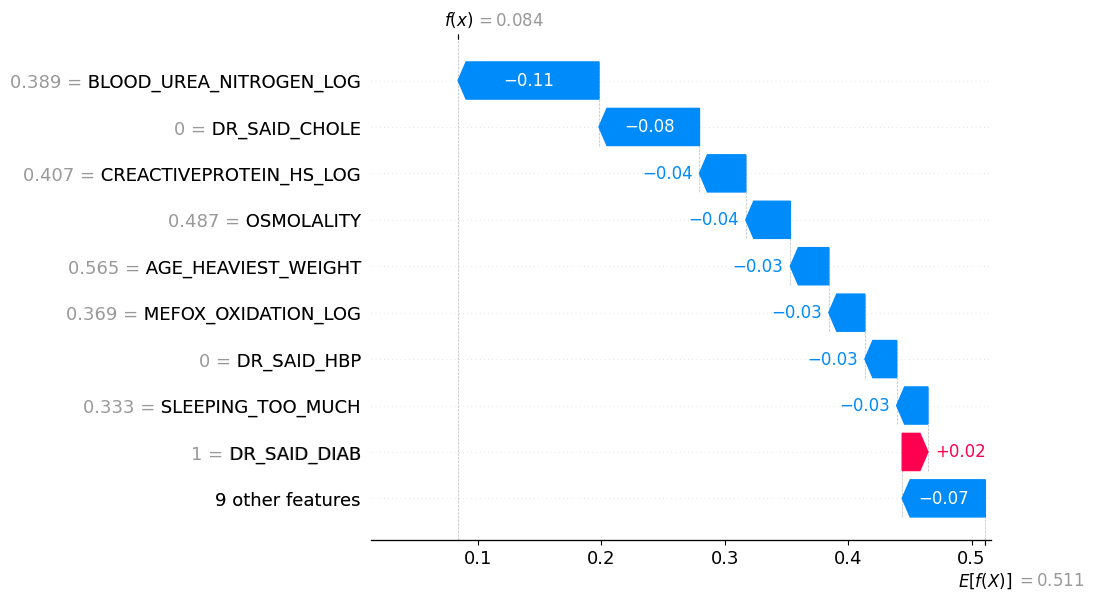

In [ ]:
# prompt: hacer un shap waterfoll para la fila 2959

!pip install shap
import shap
import pandas as pd
import numpy as np

# Crea un objeto explainer usando el modelo entrenado (rf) y el conjunto de entrenamiento (x_train_undersampled)
explainer = shap.TreeExplainer(rf, x_train_undersampled)

# Calcula los valores SHAP para el conjunto de prueba (x_test)
# Disable the additivity check as suggested by the error message
# shap_values will be a list of arrays, one for each class
shap_values = explainer.shap_values(x_test, check_additivity=False)

# Define the index label of the instance you want to explain
index_to_explain_label = 2959

# Check if the index label exists in the x_test DataFrame index
if index_to_explain_label in x_test.index:
    # Get the integer position of the instance with the specified index label
    instance_position = x_test.index.get_loc(index_to_explain_label)

    # Select the corresponding SHAP values for the instance at instance_position,
    # for all features (:) and the positive class (index 1).
    # The shape of shap_values is (n_instances, n_features, n_classes)
    shap_values_instance = shap_values[instance_position][:, 1]

    # Select the instance data from x_test using its index label
    instance_to_explain = x_test.loc[index_to_explain_label]

    # Visualiza el gráfico waterfall para la instancia seleccionada
    # The base value for the waterfall plot should be the expected value for the positive class
    shap.waterfall_plot(shap.Explanation(values=shap_values_instance,
                                         base_values=explainer.expected_value[1],
                                         data=instance_to_explain,
                                         feature_names=x_test.columns.tolist()))
else:
    print(f"Index label {index_to_explain_label} not found in x_test index.")
    print("Please choose an index label that exists in x_test.index.")

❌ ¿Qué está fallando?
El modelo está cometiendo un error porque varias variables con fuerte relación con la enfermedad están:

Reduciendo la predicción, aunque quizá deberían aumentarla.

No están presentes (en valor) cuando podrían haber influido positivamente en la predicción.

🔍 Análisis de las variables importantes:
BLOOD_UREA_NITROGEN_LOG = 0.389 → SHAP = −0.11
→ Este valor está bajando mucho la predicción. Podría ser que el valor esté en un rango “normal” o “bajo”, cuando en casos positivos suele estar alto.

DR_SAID_CHOLE = 0 → SHAP = −0.08
→ No dijo que tiene colesterol. El modelo considera esto como indicio de salud.

CREACTIVEPROTEIN_HS_LOG = 0.407 → SHAP = −0.04
→ Quizá el valor no es lo suficientemente alto como para indicar inflamación.

DR_SAID_DIAB = 1 → SHAP = +0.02
→ El modelo sí detectó diabetes, que aumenta un poco la predicción, pero no fue suficiente.

 96%|=================== | 7640/7986 [00:15<00:00]       

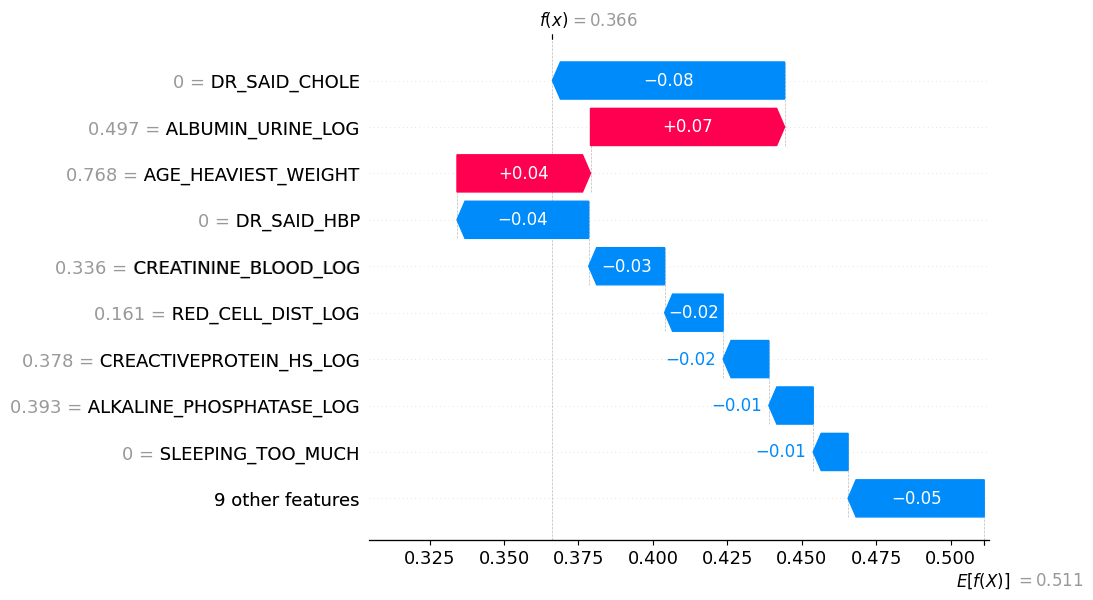

In [ ]:
# prompt: hacer un shap waterfoll para la fila 2959

!pip install shap
import shap
import pandas as pd
import numpy as np

# Crea un objeto explainer usando el modelo entrenado (rf) y el conjunto de entrenamiento (x_train_undersampled)
explainer = shap.TreeExplainer(rf, x_train_undersampled)

# Calcula los valores SHAP para el conjunto de prueba (x_test)
# Disable the additivity check as suggested by the error message
# shap_values will be a list of arrays, one for each class
shap_values = explainer.shap_values(x_test, check_additivity=False)

# Define the index label of the instance you want to explain
index_to_explain_label = 7676

# Check if the index label exists in the x_test DataFrame index
if index_to_explain_label in x_test.index:
    # Get the integer position of the instance with the specified index label
    instance_position = x_test.index.get_loc(index_to_explain_label)

    # Select the corresponding SHAP values for the instance at instance_position,
    # for all features (:) and the positive class (index 1).
    # The shape of shap_values is (n_instances, n_features, n_classes)
    shap_values_instance = shap_values[instance_position][:, 1]

    # Select the instance data from x_test using its index label
    instance_to_explain = x_test.loc[index_to_explain_label]

    # Visualiza el gráfico waterfall para la instancia seleccionada
    # The base value for the waterfall plot should be the expected value for the positive class
    shap.waterfall_plot(shap.Explanation(values=shap_values_instance,
                                         base_values=explainer.expected_value[1],
                                         data=instance_to_explain,
                                         feature_names=x_test.columns.tolist()))
else:
    print(f"Index label {index_to_explain_label} not found in x_test index.")
    print("Please choose an index label that exists in x_test.index.")

ELEMENTOS COMUNES DE LOS DOS FALSOS NEGATIVOS ANTERIORES:

| Variable                    | Caso 1 (f(x)=0.084) | Caso 2 (f(x)=0.366) | Comentario                                                                                                      |
| --------------------------- | ------------------- | ------------------- | --------------------------------------------------------------------------------------------------------------- |
| `DR_SAID_CHOLE = 0`         | −0.08               | −0.08               | Consistente en ambos. No haber declarado colesterol baja la predicción.                                         |
| `C-REACTIVE_PROTEIN_HS_LOG` | −0.04               | −0.02               | Presente en ambos, bajando la predicción. Podría estar en rango poco relevante.                                 |
| `AGE_HEAVIEST_WEIGHT`       | −0.03               | +0.04               | En el segundo ayuda a subir un poco, en el primero resta. Quizás el valor en el primer caso indica bajo riesgo. |
| `DR_SAID_HBP = 0`           | −0.03               | −0.04               | No tener hipertensión está penalizando. De nuevo, el modelo lo ve como "buena salud".                           |
| `SLEEPING_TOO_MUCH`         | −0.03               | −0.01               | En ambos resta, pero poco. Podría no ser un buen predictor.                                                     |





 99%|===================| 7875/7986 [00:16<00:00]       

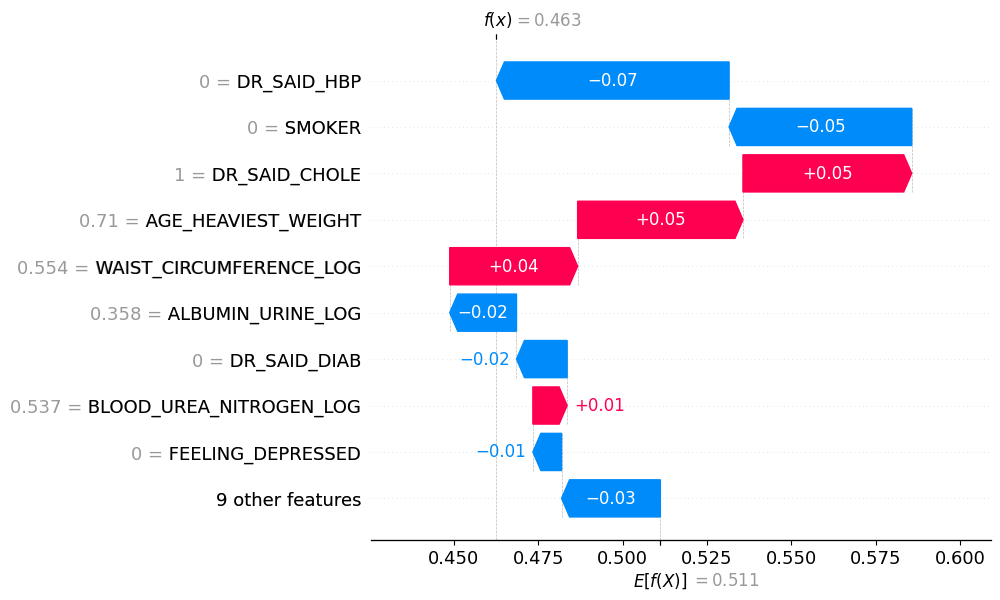

In [ ]:
# prompt: hacer un shap waterfoll para la fila 11201

!pip install shap
import shap
import pandas as pd
import numpy as np

# Crea un objeto explainer usando el modelo entrenado (rf) y el conjunto de entrenamiento (x_train_undersampled)
explainer = shap.TreeExplainer(rf, x_train_undersampled)

# Calcula los valores SHAP para el conjunto de prueba (x_test)
# Disable the additivity check as suggested by the error message
# shap_values will be a list of arrays, one for each class
shap_values = explainer.shap_values(x_test, check_additivity=False)

# Define the index label of the instance you want to explain
index_to_explain_label = 11201

# Check if the index label exists in the x_test DataFrame index
if index_to_explain_label in x_test.index:
    # Get the integer position of the instance with the specified index label
    instance_position = x_test.index.get_loc(index_to_explain_label)

    # Select the corresponding SHAP values for the instance at instance_position,
    # for all features (:) and the positive class (index 1).
    # The shape of shap_values is (n_instances, n_features, n_classes)
    shap_values_instance = shap_values[instance_position][:, 1]

    # Select the instance data from x_test using its index label
    instance_to_explain = x_test.loc[index_to_explain_label]

    # Visualiza el gráfico waterfall para la instancia seleccionada
    # The base value for the waterfall plot should be the expected value for the positive class
    shap.waterfall_plot(shap.Explanation(values=shap_values_instance,
                                         base_values=explainer.expected_value[1],
                                         data=instance_to_explain,
                                         feature_names=x_test.columns.tolist()))
else:
    print(f"Index label {index_to_explain_label} not found in x_test index.")
    print("Please choose an index label that exists in x_test.index.")

In [ ]:
# prompt: # prompt: hacer un shap waterfoll para la fila 11201 y poner el resultado en una tabla

# Extract SHAP values and feature values for the specific instance
instance_shap_values = shap_values[instance_position][:, 1]
instance_feature_values = x_test.loc[index_to_explain_label]

# Create a DataFrame to display the SHAP values and feature values in a table
shap_table = pd.DataFrame({
    'Feature': x_test.columns.tolist(),
    'Feature Value': instance_feature_values.values,
    'SHAP Value (Positive Class)': instance_shap_values
})

# Sort the table by the absolute SHAP value to see the most impactful features first
shap_table['Abs SHAP Value'] = shap_table['SHAP Value (Positive Class)'].abs()
shap_table = shap_table.sort_values(by='Abs SHAP Value', ascending=False).drop(columns='Abs SHAP Value')

# Add the base value and the prediction value to the table
base_value_row = pd.DataFrame({
    'Feature': ['Base Value'],
    'Feature Value': [''],
    'SHAP Value (Positive Class)': [explainer.expected_value[1]]
})

# Calculate the predicted value for the instance
predicted_value = explainer.expected_value[1] + instance_shap_values.sum()
predicted_value_row = pd.DataFrame({
    'Feature': ['Predicted Value'],
    'Feature Value': [''],
    'SHAP Value (Positive Class)': [predicted_value]
})


shap_table = pd.concat([base_value_row, shap_table, predicted_value_row], ignore_index=True)


print(f"\nSHAP values for instance with index label {index_to_explain_label} (Positive Class Prediction):")
display(shap_table)



SHAP values for instance with index label 11201 (Positive Class Prediction):


Feature Feature Value  SHAP Value (Positive Class)
0                 Base Value                                   0.511193
1                DR_SAID_HBP           0.0                    -0.068963
2                     SMOKER           0.0                    -0.054150
3              DR_SAID_CHOLE           1.0                     0.050024
4        AGE_HEAVIEST_WEIGHT      0.710145                     0.049009
5    WAIST_CIRCUMFERENCE_LOG      0.553854                     0.037923
6          ALBUMIN_URINE_LOG      0.358259                    -0.019792
7               DR_SAID_DIAB           0.0                    -0.015011
8    BLOOD_UREA_NITROGEN_LOG      0.537157                     0.010155
9          FEELING_DEPRESSED           0.0                    -0.008510
10         RED_CELL_DIST_LOG      0.215049                    -0.007229
11      CREATININE_BLOOD_LOG      0.368618                    -0.005368
12                OSMOLALITY      0.434211                    -0.005161
13             ALBUMIN_BLOOD      0.588235                    -0.004939
14         SLEEPING_TOO_MUCH           0.0                    -0.003483
15       MEFOX_OXIDATION_LOG      0.434352                    -0.002120
16  ALKALINE_PHOSPHATASE_LOG      0.388552                    -0.001914
17   CREACTIVEPROTEIN_HS_LOG      0.172542                     0.000752
18      CANCER_OR_MALIGNANCY           0.0                     0.000177
19           Predicted Value                                   0.462594

🔁 Patrones comunes observados en los 3 falsos negativos:
* DR_SAID_HBP = 0 (no hipertensión declarada)
En los tres casos este valor aparece como una contribución negativa fuerte al score final.

SHAP lo penaliza bastante: entre -0.04 y -0.07.

Conclusión: tu modelo interpreta la ausencia de hipertensión como un factor que aleja la predicción del positivo (es decir, del riesgo cardiovascular).

* DR_SAID_CHOLE aparece en todos y con impacto relevante
Cuando es 1 (colesterol declarado), empuja hacia la clase positiva.

Pero si el resto de las variables no acompañan, no es suficiente para compensar otros efectos negativos.

* ALBUMIN_URINE_LOG tiene impacto mixto
A veces contribuye positivamente, otras negativamente.

Esto puede indicar que su relación con el riesgo no es lineal o tiene interacciones con otras variables.

* AGE_HEAVIEST_WEIGHT está presente en todos
Siempre tiene una contribución positiva, pero moderada, no llega a compensar los factores negativos.

El modelo lo considera un riesgo, pero parece que el umbral de corte que usas puede estar amortiguando su efecto.

* SMOKER = 0 penaliza el score (caso 3)
En el tercer caso, no fumar reduce fuertemente la predicción de riesgo, a pesar de que había otras variables empujando al alza. Esto puede estar haciendo que el modelo no detecte correctamente ciertos perfiles de riesgo no fumadores.



📉 Posibles causas del fallo del modelo en estos casos:
* Demasiada confianza en la ausencia de ciertos factores clínicos "explícitos" (como HBP, DIAB o SMOKER) y poca sensibilidad a ciertos indicadores "bioquímicos" que sí están alterados.

* Umbral de predicción algo alto (0.5 por ejemplo): los tres falsos negativos tienen scores cercanos a 0.46–0.50, lo cual sugiere que revisar el umbral de decisión podría mejorar el recall sin penalizar tanto la precisión.

* Falta de interacción entre variables: Algunos efectos no se están captando bien si los datos no están enriquecidos con variables combinadas (por ejemplo, interacciones entre edad, peso y niveles de creatinina).

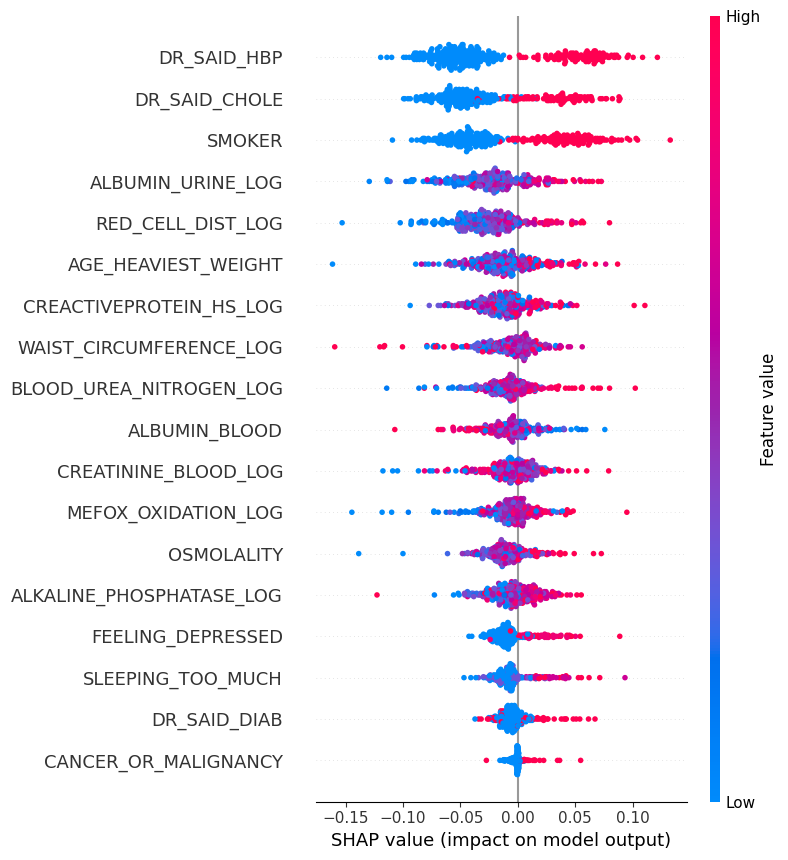

In [ ]:
# prompt: quiero hacer un shap.summary_plot para todos las filas de falsos negativos

# Get the indices of the false negatives
false_negative_indices = results_rf[(results_rf['HEART_DISEASE_original'] == 1) & (results_rf['HEART_DISEASE_predicted'] == 0)].index

# Select the false negative instances from the test set
x_false_negatives = x_test.loc[false_negative_indices]

# Get the integer positions of the false negative indices in the original x_test index
false_negative_positions = [x_test.index.get_loc(idx) for idx in false_negative_indices]

# Calculate SHAP values for the false negative instances
# We already calculated shap_values for the whole x_test.
# We now select the SHAP values corresponding to the false negative instances
# and select the values for the positive class (index 1)
shap_values_fn = shap_values[false_negative_positions, :, 1]


# Generate the summary plot for the false negative instances
# Use the SHAP values for the positive class (index 1) and the corresponding false negative instances
shap.summary_plot(shap_values_fn, x_false_negatives)

# If you want to generate a different type of summary plot (e.g., bar plot)
# shap.summary_plot(shap_values_fn, x_false_negatives, plot_type="bar")